In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Introduction
SPYI, is the abbreviation for SPDR MSCI All Country World Investable Market UCITS ETF ACC, a popular ETF which follows the MSCI World index (https://www.msci.com/indexes/index/990100). The MSCI World Index represents large and mid cap stocks across developed market countries and has 1353 constituents. SPYI is an alternative for other popular ETFs such as IWDA and VWCE which are ETFs that investors also use to get a broad financial market exposure. 

In [2]:
filepath = "spyidata.csv"
if os.path.exists(filepath):
    print(f"File {filepath} already exists. Loading data from file.")
    spyidata = pd.read_csv(filepath, index_col=0, parse_dates=True)
else:
    spyi = yf.Ticker("SPYI.DE")
    spyidata = spyi.history(period="max")
    
    spyidata.to_csv(filepath)



File spyidata.csv already exists. Loading data from file.


The ETF was founded in 2011 and the earliest data that you can retrieve using the yfinance package (from Yahoo) is also from May 2011

In [3]:
spyidata.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2011-05-16 00:00:00+02:00,75.000000,75.000000,75.000000,75.000000,0,0.0,0.0,0.0
2011-05-17 00:00:00+02:00,74.630501,74.630501,74.630501,74.630501,0,0.0,0.0,0.0
2011-05-18 00:00:00+02:00,52.660000,52.970001,52.660000,52.660000,0,0.0,0.0,0.0
2011-05-19 00:00:00+02:00,52.950001,52.950001,52.950001,52.950001,0,0.0,0.0,0.0
2011-05-20 00:00:00+02:00,53.029999,53.029999,53.029999,53.029999,0,0.0,0.0,0.0


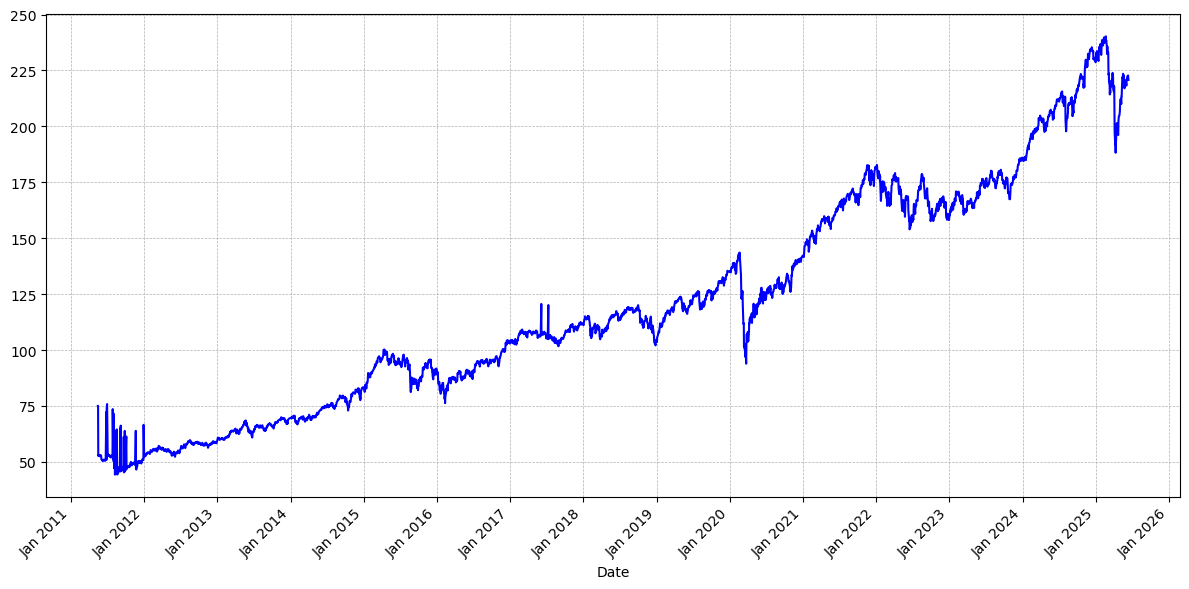

In [ ]:
fig,ax = plt.subplots(figsize=(12, 6))
spyidata['Close'].plot(ax=ax, color='blue', label='SPYI Close Price')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent clipping of tick-labels
plt.show()

## Wealth index for SPYI ETF
A wealth index is a financial concept used to track the growth of an investment portfolio over time. It essentially measures how the value of an investment changes, starting from an initial value and adjusting based on returns, reinvestments, and other factors. 

Below is the dailly% change of the SPYI ETF 

In [8]:
dailychanges =spyidata['Close'].pct_change(periods=1)*100
dailychanges.tail(10)

Date
2025-05-29 00:00:00+02:00   -0.453515
2025-05-30 00:00:00+02:00   -0.068334
2025-06-02 00:00:00+02:00   -0.501484
2025-06-03 00:00:00+02:00    1.237112
2025-06-04 00:00:00+02:00    0.067893
2025-06-05 00:00:00+02:00    0.135680
2025-06-06 00:00:00+02:00    0.406508
2025-06-09 00:00:00+02:00    0.089967
2025-06-10 00:00:00+02:00    0.112360
2025-06-12 00:00:00+02:00   -0.897868
Name: Close, dtype: float64

With a series of daily returns for a stock/ETF, it is possible to calculate wealth index, by compounding the periodic returns

In [10]:
dailychanges = spyidata['Close'].pct_change(periods=1)
cumreturns = (1 + dailychanges).cumprod() - 1
#set initial wealth value
initial_wealth = 100
wealth_index = initial_wealth * (1 + cumreturns)
print(wealth_index.tail(10))

Date
2025-05-29 00:00:00+02:00    292.666667
2025-05-30 00:00:00+02:00    292.466675
2025-06-02 00:00:00+02:00    291.000000
2025-06-03 00:00:00+02:00    294.599996
2025-06-04 00:00:00+02:00    294.800008
2025-06-05 00:00:00+02:00    295.199992
2025-06-06 00:00:00+02:00    296.400004
2025-06-09 00:00:00+02:00    296.666667
2025-06-10 00:00:00+02:00    297.000000
2025-06-12 00:00:00+02:00    294.333333
Name: Close, dtype: float64


The wealthindex focuses solely on returns and does not consider the level of risk to achieve the return.